# Threshold simulation for CSS codes

Progress:
- CSS code zoo: almost completed
- Simulation ready
- Best curve for SPC: 1515
- needed: multiple qubits, e.g. 2525

Next step:
- [ ] find optimal curve

## Import and parameters

In [2]:
# import
import matplotlib.pyplot as plt
import numpy as np
import json
import scipy # mmread

In [3]:
#LaTeX font in plots
plt.rcParams.update({"text.usetex": True})
#plt.rcParams.update({"text.usetex": False})
plt.rcParams["figure.figsize"] = (5,3.2)
#plt.figure(figsize=(4,2.4))

In [3]:
#result_folder='result/unchecked/'  #simulation result for random window decoder
result_folder='result/min_weight/'  #simulation result for syndromeb table decoding
result_folder='result/min_weight_new_range/'  # p start from 0.2 instead from 0.1
fig_folder='result/fig/'   #folder to save figs

## Example: Steane Codes [[7,1,3]]

In [4]:
# parity check matrices of Steane codes saved in Matrix Market format
print('Gx')
Gx=scipy.io.mmread('result/input-data/n7k1d3-x3z3dx3dz3-0Gx.mm')
print(Gx.todense())
print('Gz')
Gz=scipy.io.mmread('result/input-data/n7k1d3-x3z3dx3dz3-0Gz.mm')
print(Gz.todense())

Gx
[[1 1 0 1 0 0 1]
 [1 1 1 0 1 0 0]
 [1 0 1 0 0 1 1]]
Gz
[[0 1 0 0 1 1 1]
 [1 1 0 1 0 0 1]
 [0 1 1 1 0 1 0]]


In [7]:
#sample data structure

#result_folder='result/unchecked/'
#data = json.load(open('result/steane.json'))
data = json.load(open(result_folder+'/n7k1d3-x3z3dx3dz3-0.json'))
#data['data_map']
data

FileNotFoundError: [Errno 2] No such file or directory: 'result/min_weight_new_range//n7k1d3-x3z3dx3dz3-0.json'

In [8]:
#extract (x,y) data for plotting
def data2plot(data_columns):
    p_qubit=[]
    p_block=[]
    for pair in data_columns:
        #only take data>0
        if pair[1] > 0 :
            p_qubit.append(pair[0])
            p_block.append(pair[1])
    return p_qubit,p_block
p_qubit,p_block = data2plot(data['data_map'])

NameError: name 'data' is not defined

FileNotFoundError: [Errno 2] No such file or directory: 'result/min_weight_new_range//steane.json'

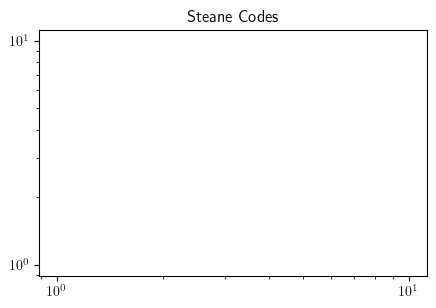

In [9]:
plt.title('Steane Codes')
plt.yscale('log'),plt.xscale('log')

data = json.load(open(result_folder+'/steane.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='Steane')

h = np.array(p_qubit)
# red dashes, blue squares and green triangles
plt.plot(h, h, 'r--',label='$y=x$')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

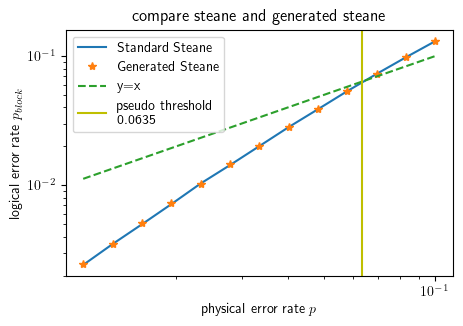

In [12]:
# Figure 1: compare steane and generated steane
plt.yscale('log'),plt.xscale('log')

data = json.load(open(result_folder+'/steane.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='Standard Steane')

data = json.load(open(result_folder+'/n7k1d3-x3z3dx3dz3-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,'*',label='Generated Steane')

h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')


p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.title('compare steane and generated steane')
plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

It looks like the two steane codes have the same distance scaling as d=3
- [x] to check better plots with more sampling date
- [x] print parity check and compare
- [x] get pesudo threshold $p=0.0635$. This match the result by Eric
- [ ] add `min weight decoder`, compare time and decoding rate

## Compare $k=1$, $d=3,4,5$

In [1]:
plt.title('compare $k=1, d=3,4,5$')
plt.yscale('log'),plt.xscale('log')

data = json.load(open('result/unchecked//n7k1d3-x3z3dx3dz3-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$[[7,1,3]]$')

data = json.load(open('result/unchecked/n15k1d4-x8z6dx4dz4-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$[[15,1,4]]$')

data = json.load(open('result/unchecked/n25k1d5-x13z11dx5dz5-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$[[25,1,5]]$')

h = np.array(p_qubit)
plt.plot(h, h, '--',label='$y=x$')


p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = '$p='+str(p_threshold))+'$'
p_threshold=0.09
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()
plt.savefig(fig_folder+'k1d3d4d5.pdf',dpi=300, bbox_inches = "tight")

NameError: name 'plt' is not defined

- distance 5 looks okay
- d=3 and d=4 need better data


## Compare $k=2$, $d=3,4,5$

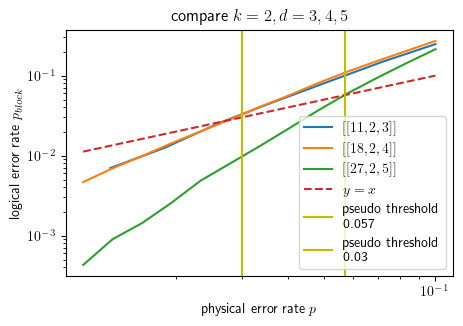

In [14]:
plt.title('compare $k=2,d=3,4,5$')
plt.yscale('log'),plt.xscale('log')

data = json.load(open('result/unchecked/n11k2d3-x4z5dx3dz3-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$[[11,2,3]]$')

data = json.load(open('result/unchecked/n18k2d4-x8z8dx4dz4-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$[[18,2,4]]$')

data = json.load(open('result/unchecked/n27k2d5-x13z12dx5dz5-0.json'))
p_qubit,p_block = data2plot(data['data_map'])
plt.plot(p_qubit,p_block,label='$[[27,2,5]]$')

h = np.array(p_qubit)
plt.plot(h, h, '--',label='$y=x$')


p_threshold=0.057
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))
p_threshold=0.03
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()
plt.savefig(fig_folder+'k2d3d4d5.pdf',dpi=300, bbox_inches = "tight")

- interesting that `d=4` has slightly worse pseudo threshold and larger logical error rate
- why? because code is larger?

e_try= 10000 , label= k2d3
e_try= 100000 , label= k2d4
e_try= 100000 , label= k2d5


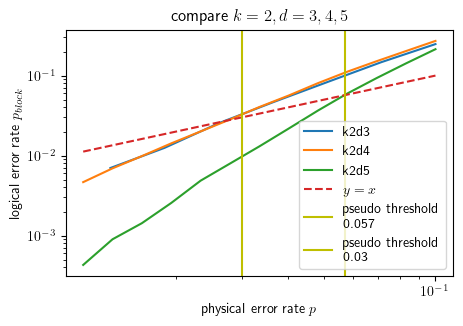

In [17]:
plt.title('compare $k=2,d=3,4,5$')
plt.yscale('log'),plt.xscale('log')

plot_code_kd(2,3)
plot_code_kd(2,4)
plot_code_kd(2,5)

h = np.array(p_qubit)
plt.plot(h, h, '--',label='$y=x$')


p_threshold=0.057
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))
p_threshold=0.03
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

## Compare $k=3$, $d=3,4,5$

e_try= 100000 , label= k3d3
e_try= 100000 , label= k3d4
e_try= 100000 , label= k3d5


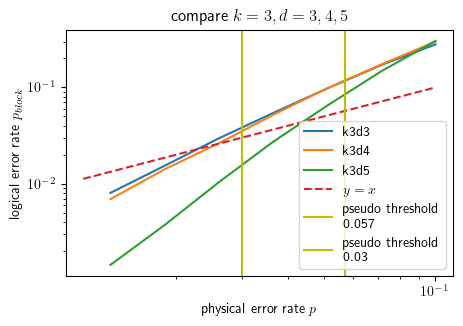

In [18]:
plt.title('compare $k=3,d=3,4,5$')
plt.yscale('log'),plt.xscale('log')

plot_code_kd(3,3)
plot_code_kd(3,4)
plot_code_kd(3,5)

h = np.array(p_qubit)
plt.plot(h, h, '--',label='$y=x$')


p_threshold=0.057
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))
p_threshold=0.03
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()
plt.savefig(fig_folder+'k3d3d4d5.pdf',dpi=300, bbox_inches = "tight")

# Threshold simulation for Subsystem Product Codes

## Define codes and plot util functions

In [10]:
# define codes with k=1 and k=2
#result_folder='result/unchecked/' #move to top of file
code1='NA NA NA n7k1d3-x3z3dx3dz3-0 n15k1d4-x8z6dx4dz4-0 n25k1d5-x13z11dx5dz5-0'.split()
code2='NA NA NA n11k2d3-x4z5dx3dz3-0 n18k2d4-x8z8dx4dz4-0 n27k2d5-x13z12dx5dz5-0'.split()
code2='NA NA NA n11k2d3-x4z5dx3dz3-1 n18k2d4-x8z8dx4dz4-1 n27k2d5-x13z12dx5dz5-1'.split()
code3='NA NA NA n11k3d3-x4z4dx3dz3-0 n19k3d4-x9z7dx4dz4-0 n29k3d5-x13z13dx5dz5-0'.split()
codes=[None,code1,code2,code3]
def plot_json(codename,label='new curve'):
    folder=result_folder
    match codename:
        case 'steane':
            data = json.load(open(folder+'steane.json'))            #n7k1d3-x3z3dx3dz3-0
            p_qubit,p_block = data2plot(data['data_map'])
            plt.plot(p_qubit,p_block,label='Steane')
        case 'steane2':
            data = json.load(open(folder+'steane2.json'))
            p_qubit,p_block = data2plot(data['data_map'])
            plt.plot(p_qubit,p_block,label='Steane2')
        case 'spc-steane':
            data = json.load(open(folder+'spc-steane.json'))
            p_qubit,p_block = data2plot(data['data_map'])
            plt.plot(p_qubit,p_block,label='SPC-Steane')
        case _:#default case
            data = json.load(open(folder+codename+'.json'))
            p_qubit,p_block = data2plot(data['data_map'])
            plt.plot(p_qubit,p_block,label=label)

def plot_code_kd(ka,da):    
    filename=result_folder+codes[ka][da]+'.json'
    data = json.load(open(filename))
    p_qubit,p_block = data2plot(data['data_map'])
    
    label=''.join(str(_) for _ in ['k',ka,'d',da])
    plt.plot(p_qubit,p_block,label=label)
    print('e_try=', data['e_try'],', label=',label)
    if data['e_try'] < 10000:
        print('limited data. e_try=', data['e_try'],', label=',label)
    pass

def plot_code_kdkd(ka,da,kb,db):
    filename=result_folder+codes[ka][da]+'_'+codes[kb][db]+'.json'
    data = json.load(open(filename))
    p_qubit,p_block = data2plot(data['data_map'])            
    label=''.join(str(_) for _ in [ka,da,'-',kb,db])
    plt.plot(p_qubit,p_block,label=label)
    print('e_try=', data['e_try'],', label=',label)
    if data['e_try'] < 10000:
        print('limited data. e_try=', data['e_try'],', label=',label)
        
def plot_toric(L:int):
#    toric=json.load(open('result/toric.json'))
#    toric=json.load(open('result/toric-8-20.json')) #even L only
    toric_json=json.load(open('pymatching/toric-trials100000000-errors100.json','r'))    #L=range(9,21)
    #print(toric[str(L)])
    data=toric_json[str(L)]
    p_qubit,p_block=data['p_qubit'],data['p_block']
    plt.plot(p_qubit,p_block,label='L={}'.format(L))

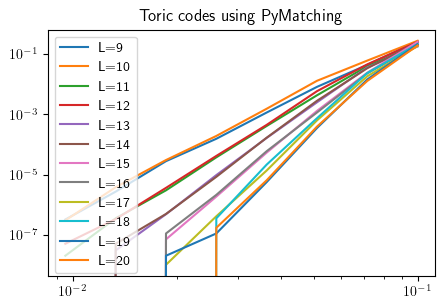

In [20]:
#check plot toric
#print(str(16))
plt.title('Toric codes using PyMatching')
plt.yscale('log'),plt.xscale('log')
for _ in range(9,21,1):
    plot_toric(_) 
plt.legend()

## Check data completeness

In [21]:
%%script echo skipping
#check completeness of data
plt.figure(figsize=(18, 12))
plt.title('all data')
plt.yscale('log'),plt.xscale('log')
plot_json('steane')

for ka,kb in [(1,1),(1,2),(2,2),(1,3),(2,3),(3,3)]:
    for a in range(3,6):
        for b in range(a,6):
            #print('a=',a,'b=',b)
            try:
                plot_code_kdkd(ka,a,kb,b)            
            except:
                print('Missing result for: ka=',ka,', kb=',kb,', a=',a,', b=',b)
            

h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='y=x^3')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

skipping


In [22]:
%%script echo skipping
#check completeness of data
#folder='result/min_weight/'
plt.figure(figsize=(18, 12))
plt.title('all data')
plt.yscale('log'),plt.xscale('log')
#plot_json('steane')

for ka,kb in [(1,1),(1,2),(2,2),(1,3),(2,3),(3,3)]:
    for a in range(3,6):
        for b in range(a,6):
            #print('a=',a,'b=',b)
            try:
                plot_code_kdkd(ka,a,kb,b)            
            except:
                print('Missing result for: ka=',ka,', kb=',kb,', a=',a,', b=',b)
            

h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='y=x^3')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

skipping


_Collection of data_

In [90]:
import os
def show_data():
    folder='result/min_weight'
#    folder='result/unchecked'
    print('All data files:')
    for f in os.listdir(folder):
        data=json.load(open(folder+'/'+f))   
        if data['e_try']>=100:
#            print(data)
            print('e_try={}\t{}\t{}'.format(data['e_try'],data['title'] if 'title' in data.keys() else '_',f))        
show_data()

All data files:
e_try=10000	none	n27k2d5-x13z12dx5dz5-0_n29k3d5-x13z13dx5dz5-0.json
e_try=1000000	none	n29k3d5-x13z13dx5dz5-0_n29k3d5-x13z13dx5dz5-0.json
e_try=1000000	none	n27k2d5-x13z12dx5dz5-0_n27k2d5-x13z12dx5dz5-0.json
e_try=10000	none	n18k2d4-x8z8dx4dz4-0_n19k3d4-x9z7dx4dz4-0.json
e_try=10000	1515	n25k1d5-x13z11dx5dz5-0_n27k2d5-x13z12dx5dz5-0.json
e_try=10000	1314	n7k1d3-x3z3dx3dz3-0_n15k1d4-x8z6dx4dz4-0.json
e_try=10000	none	n19k3d4-x9z7dx4dz4-0_n29k3d5-x13z13dx5dz5-0.json
e_try=10000	1414	n15k1d4-x8z6dx4dz4-0_n15k1d4-x8z6dx4dz4-0.json
e_try=10000	none	n15k1d4-x8z6dx4dz4-0_n19k3d4-x9z7dx4dz4-0.json
e_try=10000	none	n25k1d5-x13z11dx5dz5-0_n29k3d5-x13z13dx5dz5-0.json
e_try=10000	none	n11k2d3-x4z5dx3dz3-0_n19k3d4-x9z7dx4dz4-0.json
e_try=10000	none	n18k2d4-x8z8dx4dz4-0_n29k3d5-x13z13dx5dz5-0.json
e_try=10000	none	n19k3d4-x9z7dx4dz4-0_n19k3d4-x9z7dx4dz4-0.json
e_try=1000000	none	n7k1d3-x3z3dx3dz3-0_n7k1d3-x3z3dx3dz3-0.json
e_try=1000000	none	n11k3d3-x4z4dx3dz3-0_n11k3d3-x4z4dx3dz3-0.

In [24]:
data['title'] if 'title' in data.keys() else 'no title'

'../data/CSS-Codes/run2/n27k2d5-x13z12dx5dz5-0'

result with 100,000 trials

for $k_a=1,k_b=1$
| $d_a    $   | 3 | 4 | 5 |   |
|-------------|---|---|---|---|
| 3           | x |   |   |   |
| 4           |   |   |   |   |
| 5           |   |   |   |   |

for $k_a=1,k_b=2$
| $d_a    $   | 3 | 4 | 5 |   |
|-------------|---|---|---|---|
| 3           |   |   |   |   |
| 4           |   |   |   |   |
| 5           |   |   |   |   |

for $k_a=2,k_b=2$
| $d_a    $   | 3 | 4 | 5 |   |
|-------------|---|---|---|---|
| 3           |   | x | x |   |
| 4           |   | x | x |   |
| 5           |   |   | x |   |



## Product of Steane codes

According to the slope, the SPC-Steane has distance 7<d<9


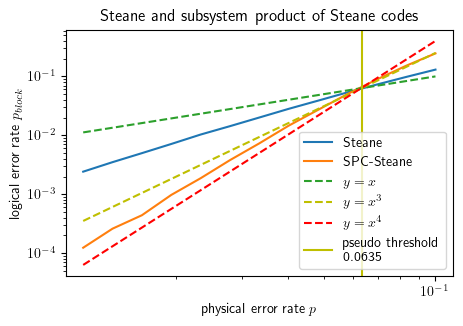

In [26]:
# Figure 1: Steane and subsystem product of Steane codes
plt.title('Steane and subsystem product of Steane codes')
plt.yscale('log'),plt.xscale('log')

plot_json(codename='steane')
plot_json(codename='spc-steane')

h = np.array(p_qubit)
plt.plot(h, h, '--',label='$y=x$')
#plt.plot(h, 20*h**2, 'g--',label='$y=x^2$')
plt.plot(h, 250*h**3, 'y--',label='$y=x^3$')
plt.plot(h, 4000*h**4, 'r--',label='$y=x^4$')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()
plt.savefig(fig_folder+'steane-spc.pdf',dpi=300, bbox_inches = "tight")
print('According to the slope, the SPC-Steane has distance 7<d<9')

e_try= 100000 , label= 13-13


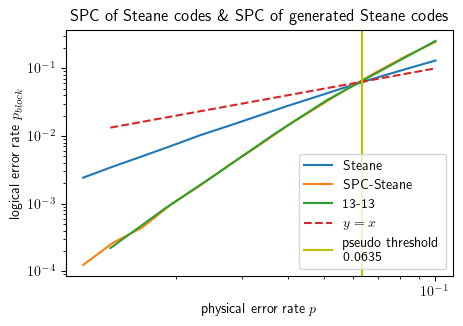

In [28]:
plt.title('SPC of Steane codes \& SPC of generated Steane codes')
plt.yscale('log'),plt.xscale('log')

plot_json('steane')
plot_json('spc-steane')
plot_code_kdkd(1,3,1,3)

h = np.array(p_qubit)
plt.plot(h, h, '--',label='$y=x$')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='y=x^3')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

## SPC of codes with varying parameters

### $k_a=1,k_b=1$

e_try= 100000 , label= 13-14


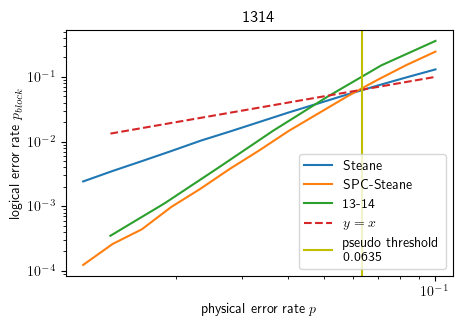

In [29]:
plt.title('1314')
plt.yscale('log'),plt.xscale('log')

plot_json('steane')
plot_json('spc-steane')
plot_code_kdkd(1,3,1,4)

h = np.array(p_qubit)
plt.plot(h, h, '--',label='$y=x$')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='y=x^3')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

e_try= 10000 , label= 13-15


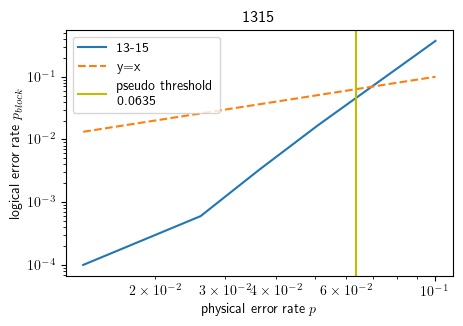

In [79]:
# Figure 1: Steane and subsystem product of Steane codes
plt.title('1315')
plt.yscale('log'),plt.xscale('log')

#plot_json('steane')
#plot_json('spc-steane')
plot_code_kdkd(1,3,1,5)

h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='y=x^3')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

e_try= 100000 , label= 13-15


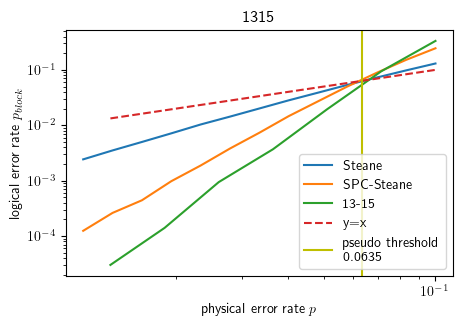

In [31]:
plt.title('1315')
plt.yscale('log'),plt.xscale('log')

plot_json('steane')
plot_json('spc-steane')
plot_code_kdkd(1,3,1,5)

h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='y=x^3')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

The best curve 1515 [[25*25,1*1,d<5*5]]=[[625,1,d<25]] match performace toric L=9,
but should compare to toric L=18, n=2L^2=648, [[648,2,18]]


e_try= 1000000 , label= 13-13
e_try= 1000000 , label= 13-15
e_try= 1000000 , label= 15-15


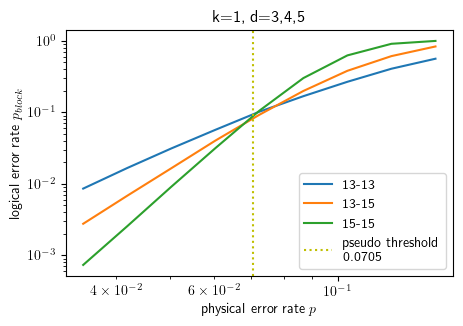

In [106]:
# Figure 1: Steane and subsystem product of Steane codes
plt.title('k=1, d=3,4,5')
plt.yscale('log'),plt.xscale('log')

#plot_json('steane')
#plot_json('spc-steane')
plot_code_kdkd(1,3,1,3)
plot_code_kdkd(1,3,1,5)
plot_code_kdkd(1,5,1,5)

#plot_toric(L=8)
#plot_toric(L=9)

h = np.array(p_qubit)
#plt.plot(h, h, ':',label='$y=x$')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='y=x^3')
#plt.plot(h, 400000000*h**8, 'r--',label='$y=x^8$')

#p_threshold=0.072
#plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))
p_threshold=0.0705
plt.axvline(x = p_threshold, linestyle=':', color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()
plt.savefig(fig_folder+'spc-k1k1.pdf',dpi=300, bbox_inches = "tight")
#plt.savefig(fig_folder+'spc-k1k1.pdf',dpi=300, bbox_inches = "tight")

In [53]:
#help(plt.axvline)

### $k_a=1,k_b=2$
- The best curve is 1525, SPC=[[25*27,1*2,d<5*5]]=[[675,2,d<25]]
- Compare to toric codes L=18, n=2L^2=648, [[648,2,18]]

e_try= 100000 , label= 13-24
e_try= 100000 , label= 13-25
e_try= 100000 , label= 15-25


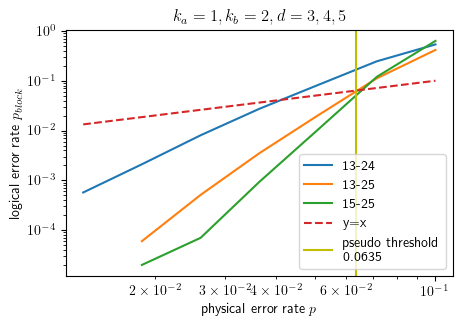

In [58]:
plt.title('$k_a=1,k_b=2, d=3,4,5$')
plt.yscale('log'),plt.xscale('log')

#plot_json('steane')
#plot_code_kdkd(1,3,1,3)
plot_code_kdkd(1,3,2,4)
plot_code_kdkd(1,3,2,5)
plot_code_kdkd(1,5,2,5)

h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='y=x^3')
#plt.plot(h, 400000000*h**8, 'r--',label='$y=x^8$')

#plot_toric(18)

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

### $k_a=2, k_b=2$
- The best curve is 2525, SPC=[[27*27,2*2,d<5*5]]=[[729,4,d<25]]. actual performance between L=10 and L=11
- Compare to two toric codes L=13, n=2L^2=338, [[338,2,13]], [[676,4,13]]. performance same as L=12
- Compare to two toric codes L=14, n=2L^2=392, [[392,2,14]], [[784,4,14]]


e_try= 100000 , label= 25-25


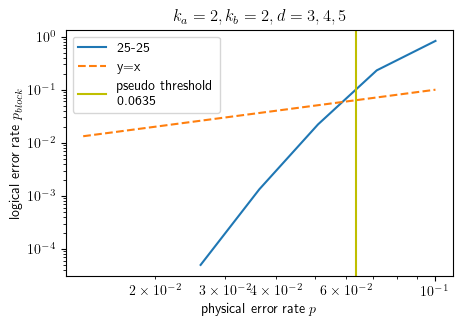

In [60]:
plt.title('$k_a=2, k_b=2, d=3,4,5$')
plt.yscale('log'),plt.xscale('log')

#plot_json('steane')

#plot_code_kdkd(1,3,1,3)
#plot_code_kdkd(2,3,2,3)  #lokks bad, maybe (k=2,d=3) code is bad
#plot_code_kdkd(2,3,2,5) #looks bad
plot_code_kdkd(2,5,2,5)

#plot_code_kdkd(1,5,2,5)

#plot_toric(L=10)
#plot_toric(L=11)
#plot_toric(L=13)
#plot_toric(L=16)
h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='$y=x^3$')
#plt.plot(h, 400000000*h**8/4.0, 'r--',label='$y=x^8/4$')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()
plt.savefig(fig_folder+'spc-k2k2-with-toric-L11L13.pdf',dpi=300, bbox_inches = "tight")

- plot $y=x^8/4$ to compare block error rate per logical qubit
- looks like the best codes 2525 can only beat L=12

- 25 corresponds to [[27,2,5]] code. SPC [[27^2,2*2,9<d<5*5]]=[[729,4,d~17]], number of qubits per logical is n/k=729/4=182
  - toric L=12, $n=2L^2=288$,

e_try= 100000 , label= 23-23
e_try= 100000 , label= 23-25
e_try= 100000 , label= 25-25


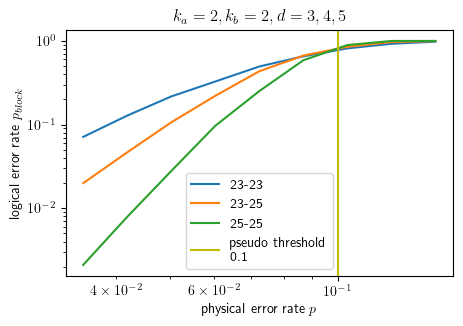

In [12]:
folder='result/unchecked/'
plt.title('$k_a=2, k_b=2, d=3,4,5$')
plt.yscale('log'),plt.xscale('log')

#plot_json('steane')

#plot_code_kdkd(1,3,1,3)
plot_code_kdkd(2,3,2,3)  #lokks bad, maybe 2,3 is a bad code
plot_code_kdkd(2,3,2,5) #looks bad
plot_code_kdkd(2,5,2,5)

#h = np.array(p_qubit)
#plt.plot(h, h, '--',label='y=x')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='$y=x^3$')
#plt.plot(h, 400000000*h**8, 'r--',label='$y=x^8$')

p_threshold=0.1
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()
plt.savefig(fig_folder+'spc-k2k2.pdf',dpi=300, bbox_inches = "tight")

e_try= 100000 , label= 13-13
e_try= 100000 , label= 23-23
e_try= 100000 , label= 23-25
e_try= 100000 , label= 25-25


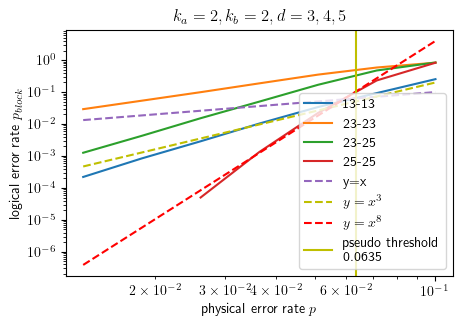

In [63]:
#folder='result/min_weight/'
plt.title('$k_a=2, k_b=2, d=3,4,5$')
plt.yscale('log'),plt.xscale('log')

#plot_json('steane')

plot_code_kdkd(1,3,1,3)
plot_code_kdkd(2,3,2,3)  #lokks bad, maybe 2,3 is a bad code
plot_code_kdkd(2,3,2,5) #looks bad
plot_code_kdkd(2,5,2,5)

h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
plt.plot(h, 200*h**3, 'y--',label='$y=x^3$')
plt.plot(h, 400000000*h**8, 'r--',label='$y=x^8$')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

### $k_a=3, k_b=3$

e_try= 1000000 , label= 33-33
e_try= 1000000 , label= 33-35
e_try= 1000000 , label= 35-35


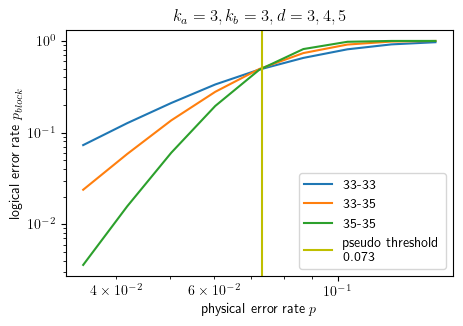

In [109]:
plt.title('$k_a=3, k_b=3, d=3,4,5$')
plt.yscale('log'),plt.xscale('log')

#plot_json('steane')

#plot_code_kdkd(1,3,1,3)
plot_code_kdkd(3,3,3,3)  #lokks bad, maybe 2,3 is a bad code
plot_code_kdkd(3,3,3,5) #looks bad
plot_code_kdkd(3,5,3,5)

h = np.array(p_qubit)
#plt.plot(h, h, '--',label='y=x')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='$y=x^3$')
#plt.plot(h, 400000000*h**8, 'r--',label='$y=x^8$')

p_threshold=0.073
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()
plt.savefig(fig_folder+'spc-k3k3.pdf',dpi=300, bbox_inches = "tight")

# TODO: what is next?
- [ ] show larger k?
- [ ] implement ReShape decoder
  - how do you know it is good or not? what to compare?
- [ ] result of toric code? pymatching?
  - compare threshold, as well as speed


# Ideas
- the surface code has high FT threshold, but the accuracy threshold with finite size is not very high. There might be some advantage for SPC
- The SPC would be weaken when witch from X type measurement to Z type measurement, and vice versa. This can be avoid with biased NOISE model.
- How about measurement noise? How to decode measurement noise in reshape decoder

# Appendix
## sample plot use `matplotlib`

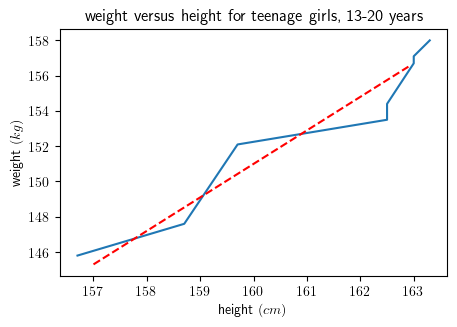

In [170]:

weight = [45.8,47.6,52.1,53.5,54.4,56.7,57.1,58.0]
weight = [145.8,147.6,152.1,153.5,154.4,156.7,157.1,158.0]
height = [156.7,158.7, 159.7,162.5,162.5,163,163,163.3]

plt.plot(height,weight)
plt.title("weight versus height for teenage girls, 13-20 years")
plt.xlabel("height $(cm)$")
plt.ylabel("weight $(kg)$")

# plot a function

h = np.arange(157., 163., .1)
w = 1.9 * h -153
# red dashes, blue squares and green triangles
plt.plot(h, w, 'r--')

# this is a mimic of linear regression/linear fit

## simulation range of physical error rate

In [171]:
val=0.1
vals = [0.1]
for i in range(13):
    val = val/1.2
    vals.append(val)
print('range used as of Dec 14, 2020')
vals

range used as of Dec 14, 2020


[0.1,
 0.08333333333333334,
 0.06944444444444446,
 0.057870370370370385,
 0.04822530864197532,
 0.0401877572016461,
 0.03348979766803842,
 0.02790816472336535,
 0.023256803936137792,
 0.019380669946781493,
 0.016150558288984578,
 0.013458798574153816,
 0.011215665478461513,
 0.009346387898717928]

In [172]:
val=0.1
vals = [0.1]
for i in range(7):
    val = val/1.4
    vals.append(val)
print('range used as after Dec 14, 2020')
vals

range used as after Dec 14, 2020


[0.1,
 0.07142857142857144,
 0.051020408163265314,
 0.036443148688046656,
 0.0260308204914619,
 0.018593443208187073,
 0.013281030862990767,
 0.009486450616421976]

## Check codes: parity check matrices and weights

In [173]:
# parity check matrices of Steane codes saved in Matrix Market format
codename='n27k2d5-x13z12dx5dz5-0'
input_folder='result/input-data/'
print('Gx')
Gx=scipy.io.mmread(input_folder+codename+'Gx.mm')
print(Gx.todense())
print('Gz')
Gz=scipy.io.mmread(input_folder+codename+'Gz.mm')
print(Gz.todense())



Gx
[[0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1]
 [1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1]
 [1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0]
 [0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1]
 [1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1]
 [1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1]
 [0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1]
 [0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1]
 [0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1]
 [1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1]
 [1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1]
 [0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1]]
Gz
[[1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0]
 [0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1]
 [1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0]
 [0 0 0 1 1 0 1 0 0 1 1 

In [174]:
#calculate weight of a matrix
def weight(row):
    #print(row)
    s=0
    for i in row:
        if i:
            s+=1;
    return s
def row_weight(G):
    for row in G:
        print(weight(row))
#        print(list(row))
#        print(weight(list(row)))

#reduce weight of a 2D array
def reduce_weight(G):
    num_rows=len(G)
    print('num_rows=',num_rows)
    row_weights=[]
    for row in G:
        row_weights.append(weight(row))
    print(row_weights)
    
    #find the row with max weight
    row_weight_max=0
    row_weight_max_index=0
    for i in range(num_rows):
        if row_weight_max<row_weights[i]:
            row_weight_max = row_weights[i]
            row_weight_max_index = i
    print('row_weight_max=',row_weight_max,'row_weight_max_index',row_weight_max_index)
    
    #now reduce its weight
    flag_updated=False
    for i in range(num_rows):
        if i == row_weight_max_index:
            continue
        row = (G[row_weight_max_index] + G[i]) % 2
        print((row))
        if weight(row) < row_weight_max:
            #update the row
            G[row_weight_max_index] = row
            #print('update for row',i,'new weight = ',weight(row))
            flag_updated=True
            break
    #print('updated:',flag_updated)
    return G
        
G=reduce_weight(Gx.todense().getA())
for i in range(10):
  G=reduce_weight(G)
#reduce weight of a matrix

num_rows= 13
[15, 16, 12, 10, 14, 12, 11, 13, 18, 14, 15, 9, 13]
row_weight_max= 18 row_weight_max_index 8
[0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0]
num_rows= 13
[15, 16, 12, 10, 14, 12, 11, 13, 11, 14, 15, 9, 13]
row_weight_max= 16 row_weight_max_index 1
[1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0]
num_rows= 13
[15, 13, 12, 10, 14, 12, 11, 13, 11, 14, 15, 9, 13]
row_weight_max= 15 row_weight_max_index 0
[1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1]
[1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0]
num_rows= 13
[13, 13, 12, 10, 14, 12, 11, 13, 11, 14, 15, 9, 13]
row_weight_max= 15 row_weight_max_index 10
[0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1]
num_rows= 13
[13, 13, 12, 10, 14, 12, 11, 13, 11, 14, 12, 9, 13]
row_weight_max= 14 row_weight_max_index 4
[1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1]
num_rows= 13
[13, 13, 12, 10, 13, 12, 11, 13, 11, 14, 12, 9, 13]
row_weight_max= 14 row_weight_max_index 9
[1 1 1 0 0 0 0 1 0 0 

In [175]:
for i in range(10):
    G=reduce_weight(G)

num_rows= 13
[12, 12, 12, 10, 10, 12, 11, 11, 11, 12, 12, 9, 11]
row_weight_max= 12 row_weight_max_index 0
[0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1]
[1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1]
[0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0]
[0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0]
[1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1]
[1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1]
[0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]
num_rows= 13
[9, 12, 12, 10, 10, 12, 11, 11, 11, 12, 12, 9, 11]
row_weight_max= 12 row_weight_max_index 1
[0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1]
[1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0]
num_rows= 13
[9, 10, 12, 10, 10, 12, 11, 11, 11, 12, 12, 9, 11]
row_weight_max= 12 row_weight_max_index 2
[1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1]
[0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1]
[1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1]
[1 1 1 1 

In [176]:
a=Gx.todense().getA()

In [177]:
for i in a:
    print(i)

[0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1]
[1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1]
[1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1]
[0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0]
[0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1]
[1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1]
[1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1]
[0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1]
[0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1]
[0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1]
[1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1]
[1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1]
[0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1]


## toric codes

16


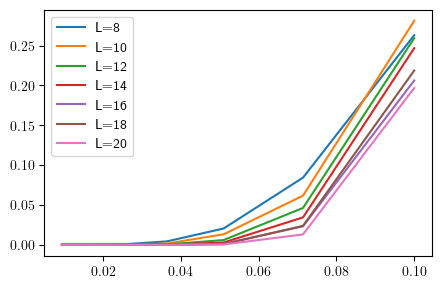

In [178]:
#check plot toric
print(str(16))
for _ in range(8,21,2):
    plot_toric(_) 
plt.legend()

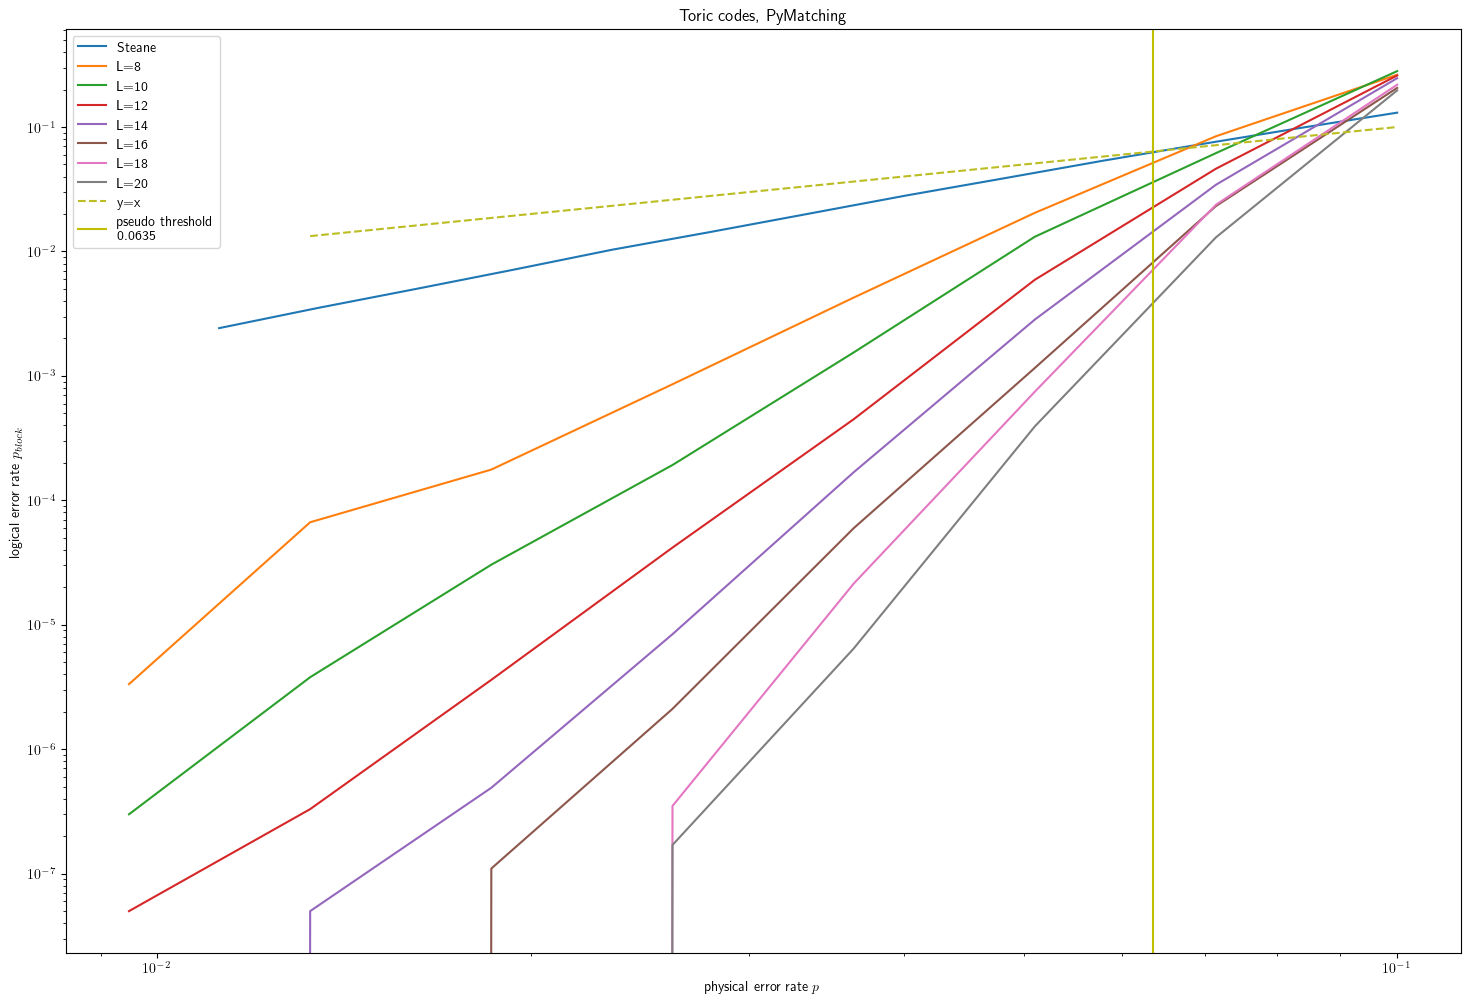

In [179]:
#check completeness of data
plt.figure(figsize=(18, 12))
plt.title('Toric codes, PyMatching')
plt.yscale('log'),plt.xscale('log')
plot_json('steane')            

for _ in range(8,21,2):
    plot_toric(_) 
    
h = np.array(p_qubit)
plt.plot(h, h, '--',label='y=x')
#plt.plot(h, 20*h**2, 'g--',label='y=x^2')
#plt.plot(h, 200*h**3, 'y--',label='y=x^3')

p_threshold=0.0635
plt.axvline(x = p_threshold, color = 'y', label = 'pseudo threshold\n'+str(p_threshold))

plt.xlabel('physical error rate $p$'), plt.ylabel('logical error rate $p_{block}$')
plt.legend()

## combine toric data

In [180]:
toric1=json.load(open('result/toric.json'))
#print(toric[str(L)])
#data=toric[str(L)]
#p_qubit,p_block=data['p_qubit'],data['p_block']
#plt.plot(p_qubit,p_block,label='L={}'.format(L))
toric2=json.load(open('result/toric2.json'))

In [181]:
for i in toric2:
    print(toric2[i])

{'p_qubit': [0.1, 0.07142857142857144, 0.051020408163265314, 0.036443148688046656, 0.0260308204914619, 0.018593443208187073, 0.013281030862990767, 0.009486450616421976], 'p_block': [0.22706666666666667, 0.05316866666666667, 0.009749666666666667, 0.00131, 0.00012, 2e-05, 0.0, 0.0]}
{'p_qubit': [0.1, 0.07142857142857144, 0.051020408163265314, 0.036443148688046656, 0.0260308204914619, 0.018593443208187073, 0.013281030862990767, 0.009486450616421976], 'p_block': [0.22396733333333332, 0.04183933333333333, 0.00486, 0.00027, 2e-05, 0.0, 0.0, 0.0]}
{'p_qubit': [0.1, 0.07142857142857144, 0.051020408163265314, 0.036443148688046656, 0.0260308204914619, 0.018593443208187073, 0.013281030862990767, 0.009486450616421976], 'p_block': [0.222357, 0.0316, 0.00239, 8e-05, 0.0, 0.0, 0.0, 0.0]}
{'p_qubit': [0.1, 0.07142857142857144, 0.051020408163265314, 0.036443148688046656, 0.0260308204914619, 0.018593443208187073, 0.013281030862990767, 0.009486450616421976], 'p_block': [0.22052866666666668, 0.02386966666

In [182]:
toric=[toric1,toric2]

In [183]:
toric={}
for i in toric1:
    toric[i]=toric1[i]

for i in toric2:
    toric[i]=toric2[i]
for i in toric:
    print(toric[i])

{'p_qubit': [0.1, 0.07142857142857144, 0.051020408163265314, 0.036443148688046656, 0.0260308204914619, 0.018593443208187073, 0.013281030862990767, 0.009486450616421976], 'p_block': [0.26312, 0.0843, 0.020426666666666666, 0.004256666666666666, 0.0008566666666666667, 0.00017666666666666666, 6.666666666666667e-05, 3.3333333333333333e-06]}
{'p_qubit': [0.1, 0.07142857142857144, 0.051020408163265314, 0.036443148688046656, 0.0260308204914619, 0.018593443208187073, 0.013281030862990767, 0.009486450616421976], 'p_block': [0.25587, 0.06282666666666667, 0.010383333333333333, 0.0015266666666666666, 0.00019, 2.3333333333333332e-05, 0.0, 0.0]}
{'p_qubit': [0.1, 0.07142857142857144, 0.051020408163265314, 0.036443148688046656, 0.0260308204914619, 0.018593443208187073, 0.013281030862990767, 0.009486450616421976], 'p_block': [0.25026, 0.04812333333333333, 0.0056233333333333335, 0.00046666666666666666, 4.6666666666666665e-05, 1e-05, 0.0, 0.0]}
{'p_qubit': [0.1, 0.07142857142857144, 0.051020408163265314,

In [184]:
json_object = json.dumps(toric, indent=4)
filename='result/toric-8-20.json'
#with open(filename, "w") as outfile:
#    outfile.write(json_object)

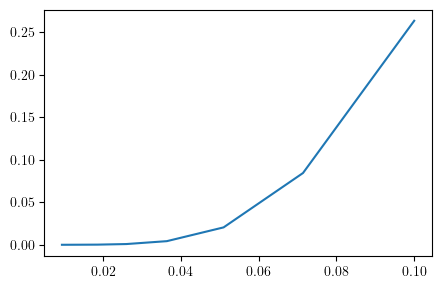

In [185]:
plot_toric(8)